# FDA Project

Installing specialized packages: webdriver-manager, selenium, and wordcloud

In [1]:
pip install webdriver-manager

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install selenium

In [3]:
conda install -c https://conda.anaconda.org/conda-forge wordcloud

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Allen\anaconda3

  added / updated specs:
    - wordcloud


The following NEW packages will be INSTALLED:

  _anaconda_depends  pkgs/main/win-64::_anaconda_depends-2022.05-py39_0
  pip                conda-forge/noarch::pip-22.1.2-pyhd8ed1ab_0
  setuptools         conda-forge/win-64::setuptools-63.1.0-py39hcbf5309_0

The following packages will be UPDATED:

  ca-certificates    pkgs/main::ca-certificates-2022.3.29-~ --> conda-forge::ca-certificates-2022.6.15-h5b45459_0
  certifi            pkgs/main::certifi-2021.10.8-py39haa9~ --> conda-forge::certifi-2022.6.15-py39hcbf5309_0
  openssl              pkgs/main::openssl-1.1.1n-h2bbff1b_0 --> conda-forge::openssl-1.1.1q-h8ffe710_0
Note: you may need to restart the kernel to use updated packages.
  wordcloud                            1.8.1-py39hb82d6ee_2 --> 1.8.2.2-py39hb82d6ee_0

The following packages will be DOWNGRADED:




The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2022.05=py39_0
  - defaults/win-64::anaconda-client==1.9.0=py39haa95532_0
  - defaults/win-64::anaconda-navigator==2.2.0=py39haa95532_0
  - defaults/noarch::anaconda-project==0.10.2=pyhd3eb1b0_0
  - defaults/win-64::astroid==2.6.6=py39haa95532_0
  - defaults/noarch::backports.functools_lru_cache==1.6.4=pyhd3eb1b0_0
  - defaults/win-64::bcrypt==3.2.0=py39h196d8e1_0
  - defaults/win-64::bokeh==2.4.2=py39haa95532_0
  - defaults/win-64::clyent==1.2.2=py39haa95532_1
  - conda-forge/win-64::conda==4.13.0=py39hcbf5309_1
  - defaults/win-64::conda-build==3.21.8=py39haa95532_2
  - defaults/noarch::conda-pack==0.6.0=pyhd3eb1b0_0
  - defaults/noarch::conda-repo-cli==1.0.4=pyhd3eb1b0_0
  - defaults/noarch::conda-token==0.3.0=pyhd3eb1b0_0
  - defaults/noarch::conda-verify==3.4.2=py_1
  - defaults/noarch::cookiecutter==1.7.3=pyhd3eb1b0_0
  - 


  anaconda                                   2022.05-py39_0 --> custom-py39_1


Preparing transaction: ...working... done
Verifying transaction: ...working... failed


  - defaults/noarch::smart_open==5.1.0=pyhd3eb1b0_0
  - defaults/noarch::sphinx==4.4.0=pyhd3eb1b0_0
  - defaults/win-64::spyder==5.1.5=py39haa95532_1
  - defaults/win-64::spyder-kernels==2.1.3=py39haa95532_0
  - defaults/win-64::twisted==22.2.0=py39h2bbff1b_0
  - defaults/win-64::widgetsnbextension==3.5.2=py39haa95532_0
  - defaults/noarch::xarray==0.20.1=pyhd3eb1b0_1
  - defaults/win-64::zope.interface==5.4.0=py39h2bbff1b_0
  - defaults/win-64::_ipyw_jlab_nb_ext_conf==0.1.0=py39haa95532_0

RemoveError: 'setuptools' is a dependency of conda and cannot be removed from
conda's operating environment.



In [4]:
#Importing of useful packages
import pandas as pd
import re
import numpy as np
import json
import datetime
from bs4 import BeautifulSoup as bs
import requests
import re
import urllib
import time
import os
import string
import nltk
#nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt, dates as mdates
%matplotlib inline
from wordcloud import WordCloud
from collections import Counter
%pylab inline
import statistics
from random import randrange


URL = "https://open.fda.gov/data/downloads/"

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [5]:
#The FDA website does not load the downloadable files unless you scroll to that area of the page first
#Web-Scraping involves using the Selenium webdriver to open the site with Chrome, navigate to the
    #needed area, and hit the correct buttons at the correct time

from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import selenium.common.exceptions
from selenium import webdriver
import time

from selenium.webdriver.support.wait import WebDriverWait

options = webdriver.ChromeOptions()

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get("https://www.google.com")

driver.get(URL)
driver.maximize_window()

time.sleep(1)

#Get past the light screen
button1 = driver.find_element(By.CLASS_NAME, "button.bg-primary.clr-white")
button1.click()

time.sleep(1)
 
    #Scroll to the button for medical device events
element_link=WebDriverWait(driver, 10).until(EC.presence_of_element_located(
   (By.XPATH, '//*[@id="Medical Device Event"]')))

driver.execute_script("arguments[0].scrollIntoView(true)", element_link)

time.sleep(1)

#Click the medical device event button
button2 = driver.find_element(By.XPATH, '//*[@id="Medical Device Event"]/section/button')
button2.click()

time.sleep(1)

#Retrieve the html code now that it displays the links we need
html = driver.execute_script("return document.getElementsByTagName('html')[0].innerHTML")
#print (html)

driver.close()

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 103.0.5060
[WDM] - Get LATEST chromedriver version for 103.0.5060 google-chrome
[WDM] - About to download new driver from https://chromedriver.storage.googleapis.com/103.0.5060.53/chromedriver_win32.zip
[WDM] - Driver has been saved in cache [C:\Users\Allen\.wdm\drivers\chromedriver\win32\103.0.5060.53]


In [6]:
#Snip HTML to just the portion in question
pattern = '1991(.*?)<li id="Medical Device PMA">'
substring = re.search(pattern, html).group(1)

In [7]:
#Itemize links into array
import lxml.html

url_list = lxml.html.fromstring(substring)
url_list = url_list.xpath('//a/@href')
#print(newlist)

In [8]:
start_year = 2011
end_year = 2021

year_list = list(range(start_year, end_year+1))

index_to_download = []

for meh in year_list:
    for bleh in range(0, len(url_list)):
        if str(meh) in url_list[bleh]:
            index_to_download.append(url_list.index(url_list[bleh]))

index_count = len(index_to_download)

In [9]:
#Follow links in array to download/process ZIPs

#Specify Download Path
path = 'C:/Users/Allen/Documents/FDA'
#pathinverse = 'C:\Users\Allen\Documents\FDA'
import requests, zipfile
from io import BytesIO

#Filter Data by Project Code, use "All" to include all data
pcode = ["CBK","MNT","MNS","NOU"]
#pcode = ["All"]

#Run loop, opening JSONs
loopnumber = 0
datamain = ""
for snuh in index_to_download:
    print('Download ' + (str(loopnumber+1)) + " of " + (str(index_count)) + " started ")
    url = url_list[snuh]
    import requests, zipfile
    req = requests.get(url)
    print('Download ' + (str(loopnumber+1))+ " completed ")
    zipfile = zipfile.ZipFile(BytesIO(req.content))
    #filename = "FDA" + str(snuh+1)
    filename = "FDAdata.json"
    for i, f in enumerate(zipfile.filelist):
        f.filename = filename.format(i)
        zipfile.extract(f)
    print('File ' + (str(loopnumber+1))+ ' extracted')
    data = json.load(open(r'C:\Users\Allen\Documents\FDA\FDAdata.json'))
    data = data["results"]
    datamain = data
    if loopnumber == 0:
        print('Creating Dataframe with JSON ' + (str(loopnumber+1)))
        dfmain = pd.json_normalize(data,
                  record_path = "device",
                  meta = ["report_number","report_source_code","date_received","event_type","type_of_report","mdr_text"],
                  record_prefix = "_",
                  errors = "ignore")
        if pcode[0] != "All":
            dfmain = dfmain[dfmain._device_report_product_code.isin(pcode)]
        print('Dataframe Created')
    else:
        print('Appending Dataframe with JSON ' + (str(loopnumber+1)))
        dfnew = pd.json_normalize(data,
                  record_path = "device",
                  meta = ["report_number","report_source_code","date_received","event_type","type_of_report","mdr_text"],
                  record_prefix = "_",
                  errors = "ignore")
        if pcode[0] != "All":
            dfnew = dfnew[dfnew._device_report_product_code.isin(pcode)]
        dfmain = pd.concat([dfmain, dfnew])
        #dfmain.append(dfnew)
        print('JSON ' + (str(loopnumber+1)) + ' appended')
        
    os.remove(path + "/" + filename)
    loopnumber = loopnumber + 1
print("Dataframe ready")
dfmain.head()

Download 1 of 132 started 
Download 1 completed 
File 1 extracted
Creating Dataframe with JSON 1
Dataframe Created
Download 2 of 132 started 
Download 2 completed 
File 2 extracted
Appending Dataframe with JSON 2
JSON 2 appended
Download 3 of 132 started 
Download 3 completed 
File 3 extracted
Appending Dataframe with JSON 3
JSON 3 appended
Download 4 of 132 started 
Download 4 completed 
File 4 extracted
Appending Dataframe with JSON 4
JSON 4 appended
Download 5 of 132 started 
Download 5 completed 
File 5 extracted
Appending Dataframe with JSON 5
JSON 5 appended
Download 6 of 132 started 
Download 6 completed 
File 6 extracted
Appending Dataframe with JSON 6
JSON 6 appended
Download 7 of 132 started 
Download 7 completed 
File 7 extracted
Appending Dataframe with JSON 7
JSON 7 appended
Download 8 of 132 started 
Download 8 completed 
File 8 extracted
Appending Dataframe with JSON 8
JSON 8 appended
Download 9 of 132 started 
Download 9 completed 
File 9 extracted
Appending Dataframe w

Download 70 completed 
File 70 extracted
Appending Dataframe with JSON 70
JSON 70 appended
Download 71 of 132 started 
Download 71 completed 
File 71 extracted
Appending Dataframe with JSON 71
JSON 71 appended
Download 72 of 132 started 
Download 72 completed 
File 72 extracted
Appending Dataframe with JSON 72
JSON 72 appended
Download 73 of 132 started 
Download 73 completed 
File 73 extracted
Appending Dataframe with JSON 73
JSON 73 appended
Download 74 of 132 started 
Download 74 completed 
File 74 extracted
Appending Dataframe with JSON 74
JSON 74 appended
Download 75 of 132 started 
Download 75 completed 
File 75 extracted
Appending Dataframe with JSON 75
JSON 75 appended
Download 76 of 132 started 
Download 76 completed 
File 76 extracted
Appending Dataframe with JSON 76
JSON 76 appended
Download 77 of 132 started 
Download 77 completed 
File 77 extracted
Appending Dataframe with JSON 77
JSON 77 appended
Download 78 of 132 started 
Download 78 completed 
File 78 extracted
Appendi

,_device_event_key,_implant_flag,_date_removed_flag,_device_sequence_number,_date_received,_brand_name,_generic_name,_manufacturer_d_name,_manufacturer_d_address_1,_manufacturer_d_address_2,...,_openfda.regulation_number,_openfda.device_class,_openfda.registration_number,_openfda.fei_number,report_number,report_source_code,date_received,event_type,type_of_report,mdr_text
460,,,,1,20110218,LTV,"VENTILATOR, CONTINUOUS / CBK","CAREFUSION 203, INC",,,...,868.5895,2,NaN,NaN,2031702-2011-00286,Manufacturer report,20110218,Malfunction,[Initial submission],"[{'mdr_text_key': '1917606', 'text_type_code':..."
529,,,,1,20110215,ESPRIT VENTILATOR,"VENTILATOR, CONTINUOUS","RESPIRONICS CALIFORNIA, INC.",2271 COSMOS CT.,,...,868.5895,2,NaN,NaN,2031642-2011-00050,Manufacturer report,20110215,Malfunction,[Initial submission],"[{'mdr_text_key': '17883306', 'text_type_code'..."
667,,,,1,20110202,ESPRIT VENTILATOR,"VENTILATOR, CONTINUOUS","RESPIRONICS CALIFORNIA, INC.",2271 COSMOS CT.,,...,868.5895,2,NaN,NaN,2031642-2011-00018,Manufacturer report,20110202,Malfunction,[Initial submission],"[{'mdr_text_key': '19663829', 'text_type_code'..."
775,,,,1,20110324,ESPRIT VENTILATOR,"VENTILATOR, CONTINUOUS","RESPIRONICS CALIFORNIA, INC.",2271 COSMOS CT.,,...,868.5895,2,NaN,NaN,2031642-2011-00076,Manufacturer report,20110324,Malfunction,[Initial submission],"[{'mdr_text_key': '1914263', 'text_type_code':..."
811,,,,1,20110228,840 VENTILATOR,VENTILATOR,PURITAN BENNETT CORP.,NEW MERVUE INDUSTRIAL PARK,,...,868.5895,2,NaN,NaN,8020893-2011-00095,Manufacturer report,20110228,Malfunction,[Initial submission],"[{'mdr_text_key': '21677455', 'text_type_code'..."


In [10]:
#dfmain.info()

#Keep only relevant columns
dfmain = dfmain[["_device_report_product_code","_brand_name","_generic_name","_manufacturer_d_name","type_of_report","report_number","report_source_code",
                 "date_received","event_type","mdr_text"]]

#Rename columns
dfmain.columns = ["product_code","brand_name","generic_name","manufacturer_name","type_of_report","report_number",
                        "report_source_code","date_received","event_type","mdr_text"]

#Update date column to date format
dfmain["date_received"] = pd.to_datetime(dfmain["date_received"])

#Remove brackets from type of report column
dfmain['type_of_report'] = dfmain['type_of_report'].str.join(', ')

#Update MDR Text to only show the text narrative items--also lowercase the text
newmdr = []
for crag in dfmain["mdr_text"]:
    newmdr.append(''.join(re.findall("'text': .+?}",str(crag))).translate(str.maketrans('', '', string.punctuation)).replace("text"," - ")[4:])

dfmain["mdr_text"] = [x.lower() for x in newmdr]
dfmain.head()

#dfmain.to_csv(r'data_test.csv', index = False)

,product_code,brand_name,generic_name,manufacturer_name,type_of_report,report_number,report_source_code,date_received,event_type,mdr_text
460,CBK,LTV,"VENTILATOR, CONTINUOUS / CBK","CAREFUSION 203, INC",Initial submission,2031702-2011-00286,Manufacturer report,2011-02-18,Malfunction,it was reported that the ventilator shut down ...
529,CBK,ESPRIT VENTILATOR,"VENTILATOR, CONTINUOUS","RESPIRONICS CALIFORNIA, INC.",Initial submission,2031642-2011-00050,Manufacturer report,2011-02-15,Malfunction,the respiratory therapist reported the ventila...
667,CBK,ESPRIT VENTILATOR,"VENTILATOR, CONTINUOUS","RESPIRONICS CALIFORNIA, INC.",Initial submission,2031642-2011-00018,Manufacturer report,2011-02-02,Malfunction,the respiratory care manager reported the foll...
775,CBK,ESPRIT VENTILATOR,"VENTILATOR, CONTINUOUS","RESPIRONICS CALIFORNIA, INC.",Initial submission,2031642-2011-00076,Manufacturer report,2011-03-24,Malfunction,the customer reported the ventilator went vent...
811,CBK,840 VENTILATOR,VENTILATOR,PURITAN BENNETT CORP.,Initial submission,8020893-2011-00095,Manufacturer report,2011-02-28,Malfunction,the service report shows the customer reported...


In [11]:
#dfmain = pd.read_csv("data_long.csv", encoding = 'unicode_escape')
#dfmain['mdr_text'] = dfmain['mdr_text'].map(str)

#Remove NA items
dfmain.fillna('', inplace=True)

#Prepare for lemmatization
lemmatizer = nltk.stem.WordNetLemmatizer()
wordnet_lemmatizer = WordNetLemmatizer()

#Create function to tag words with what part of speech they are
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

#Create function to separate strings into words, assign parts of speech, and lemmatize accordingly
def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

#Perform Lemmatization - this step can take some time
#If the dataset is particularly large at this point, it may be worth skipping this step
dfmain['mdr_text'] = dfmain['mdr_text'].apply(lambda x: lemmatize_sentence(x))

#Remove stop words
stop_words = set(stopwords.words('english'))

#Add additional common words into stopwords
stop_words.update(["investigation","still","progress","complete","supplemental","report","filed","device","returned","reported",
                  "-","due","failure","failed","may","ensure","assures","around","met","reports","number","per","dated","patient",
                  "conclusion","performed","year","years","therefore","submitted","information","received","upon","event",
                  "events","review","required","appropriate","monitored","monitor","basis","continue","monthly","trends","completion",
                  "additional","months","yet","without","history","regarding","cause","record","established","accordingly","procedure",
                  "provided","underwent","reason","evaluation","time","related","product","severed","post","return","made","also",
                  "andor","multiple","remains","determined","replacement","definitive","issues","however","clinical","factors",
                  "effects","release","identified","cannot","reviewed","would","including","available","issued","observation",
                  "common","action","regard","make","future","severe","issue","require","receive","month","submit","occur",
                  "factor","include","provide","remain","contribute","establish","relate","effect","replace","analysis","via",
                  "perform","subject","likely","although"])

dfmain = dfmain[dfmain['mdr_text'].notnull()]

dfmain['mdr_text'] = dfmain['mdr_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

dfmain.head()

,product_code,brand_name,generic_name,manufacturer_name,type_of_report,report_number,report_source_code,date_received,event_type,mdr_text
460,CBK,LTV,"VENTILATOR, CONTINUOUS / CBK","CAREFUSION 203, INC",Initial submission,2031702-2011-00286,Manufacturer report,2011-02-18,Malfunction,ventilator shut connect pt external battery po...
529,CBK,ESPRIT VENTILATOR,"VENTILATOR, CONTINUOUS","RESPIRONICS CALIFORNIA, INC.",Initial submission,2031642-2011-00050,Manufacturer report,2011-02-15,Malfunction,respiratory therapist ventilator transition ba...
667,CBK,ESPRIT VENTILATOR,"VENTILATOR, CONTINUOUS","RESPIRONICS CALIFORNIA, INC.",Initial submission,2031642-2011-00018,Manufacturer report,2011-02-02,Malfunction,respiratory care manager follow b6 2010 b6 nur...
775,CBK,ESPRIT VENTILATOR,"VENTILATOR, CONTINUOUS","RESPIRONICS CALIFORNIA, INC.",Initial submission,2031642-2011-00076,Manufacturer report,2011-03-24,Malfunction,customer ventilator go vent inop alarm use cus...
811,CBK,840 VENTILATOR,VENTILATOR,PURITAN BENNETT CORP.,Initial submission,8020893-2011-00095,Manufacturer report,2011-02-28,Malfunction,service show customer 840 ventilator stop cycl...


In [12]:
#dfmain = pd.read_csv("data.csv", encoding = 'unicode_escape')

no_dup = []

#Following function found from internet
def remove_duplicates(input):
 
    # split input string separated by space
    input = input.split(" ")
 
    # now create dictionary using counter method
    # which will have strings as key and their
    # frequencies as value
    UniqW = Counter(input)
 
    # joins two adjacent elements in iterable way
    s = " ".join(UniqW.keys())
    return (s)

dfmain['mdr_text_nodup'] = dfmain['mdr_text'].apply(remove_duplicates)

dfmain['mdr_text_nodup'] = dfmain['mdr_text_nodup'].map(str)

dfmain.head()

,product_code,brand_name,generic_name,manufacturer_name,type_of_report,report_number,report_source_code,date_received,event_type,mdr_text,mdr_text_nodup
460,CBK,LTV,"VENTILATOR, CONTINUOUS / CBK","CAREFUSION 203, INC",Initial submission,2031702-2011-00286,Manufacturer report,2011-02-18,Malfunction,ventilator shut connect pt external battery po...,ventilator shut connect pt external battery po...
529,CBK,ESPRIT VENTILATOR,"VENTILATOR, CONTINUOUS","RESPIRONICS CALIFORNIA, INC.",Initial submission,2031642-2011-00050,Manufacturer report,2011-02-15,Malfunction,respiratory therapist ventilator transition ba...,respiratory therapist ventilator transition ba...
667,CBK,ESPRIT VENTILATOR,"VENTILATOR, CONTINUOUS","RESPIRONICS CALIFORNIA, INC.",Initial submission,2031642-2011-00018,Manufacturer report,2011-02-02,Malfunction,respiratory care manager follow b6 2010 b6 nur...,respiratory care manager follow b6 2010 nursin...
775,CBK,ESPRIT VENTILATOR,"VENTILATOR, CONTINUOUS","RESPIRONICS CALIFORNIA, INC.",Initial submission,2031642-2011-00076,Manufacturer report,2011-03-24,Malfunction,customer ventilator go vent inop alarm use cus...,customer ventilator go vent inop alarm use har...
811,CBK,840 VENTILATOR,VENTILATOR,PURITAN BENNETT CORP.,Initial submission,8020893-2011-00095,Manufacturer report,2011-02-28,Malfunction,service show customer 840 ventilator stop cycl...,service show customer 840 ventilator stop cycl...


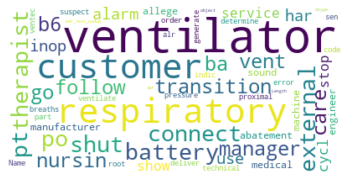

In [13]:
#Implement Word Cloud
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(str(dfmain["mdr_text_nodup"]))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('foo.png')
plt.show()

In [14]:
#Create new date field with the days removed, for visualizations

#dfmain = pd.read_csv("data.csv", encoding = 'unicode_escape')
#dfmain['mdr_text_nodup'] = dfmain['mdr_text_nodup'].map(str)

dfmain["year"] = pd.to_datetime(dfmain["date_received"], format = '%Y-%m-%d').dt.year
dfmain["month"] = pd.to_datetime(dfmain["date_received"], format = '%Y-%m-%d').dt.month

dfmain["plaindate"] = pd.to_datetime(dfmain[['year', 'month']].assign(DAY=1))

dfmain = dfmain.drop(["year","month"], 1)

dfmain.head()

#dfmain.to_csv(r'data_vent.csv', index = False)

C:\Users\Allen\AppData\Local\Temp\ipykernel_19300\879363742.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dfmain = dfmain.drop(["year","month"], 1)


,product_code,brand_name,generic_name,manufacturer_name,type_of_report,report_number,report_source_code,date_received,event_type,mdr_text,mdr_text_nodup,plaindate
460,CBK,LTV,"VENTILATOR, CONTINUOUS / CBK","CAREFUSION 203, INC",Initial submission,2031702-2011-00286,Manufacturer report,2011-02-18,Malfunction,ventilator shut connect pt external battery po...,ventilator shut connect pt external battery po...,2011-02-01
529,CBK,ESPRIT VENTILATOR,"VENTILATOR, CONTINUOUS","RESPIRONICS CALIFORNIA, INC.",Initial submission,2031642-2011-00050,Manufacturer report,2011-02-15,Malfunction,respiratory therapist ventilator transition ba...,respiratory therapist ventilator transition ba...,2011-02-01
667,CBK,ESPRIT VENTILATOR,"VENTILATOR, CONTINUOUS","RESPIRONICS CALIFORNIA, INC.",Initial submission,2031642-2011-00018,Manufacturer report,2011-02-02,Malfunction,respiratory care manager follow b6 2010 b6 nur...,respiratory care manager follow b6 2010 nursin...,2011-02-01
775,CBK,ESPRIT VENTILATOR,"VENTILATOR, CONTINUOUS","RESPIRONICS CALIFORNIA, INC.",Initial submission,2031642-2011-00076,Manufacturer report,2011-03-24,Malfunction,customer ventilator go vent inop alarm use cus...,customer ventilator go vent inop alarm use har...,2011-03-01
811,CBK,840 VENTILATOR,VENTILATOR,PURITAN BENNETT CORP.,Initial submission,8020893-2011-00095,Manufacturer report,2011-02-28,Malfunction,service show customer 840 ventilator stop cycl...,service show customer 840 ventilator stop cycl...,2011-02-01


In [15]:
dfmain.head()

,product_code,brand_name,generic_name,manufacturer_name,type_of_report,report_number,report_source_code,date_received,event_type,mdr_text,mdr_text_nodup,plaindate
460,CBK,LTV,"VENTILATOR, CONTINUOUS / CBK","CAREFUSION 203, INC",Initial submission,2031702-2011-00286,Manufacturer report,2011-02-18,Malfunction,ventilator shut connect pt external battery po...,ventilator shut connect pt external battery po...,2011-02-01
529,CBK,ESPRIT VENTILATOR,"VENTILATOR, CONTINUOUS","RESPIRONICS CALIFORNIA, INC.",Initial submission,2031642-2011-00050,Manufacturer report,2011-02-15,Malfunction,respiratory therapist ventilator transition ba...,respiratory therapist ventilator transition ba...,2011-02-01
667,CBK,ESPRIT VENTILATOR,"VENTILATOR, CONTINUOUS","RESPIRONICS CALIFORNIA, INC.",Initial submission,2031642-2011-00018,Manufacturer report,2011-02-02,Malfunction,respiratory care manager follow b6 2010 b6 nur...,respiratory care manager follow b6 2010 nursin...,2011-02-01
775,CBK,ESPRIT VENTILATOR,"VENTILATOR, CONTINUOUS","RESPIRONICS CALIFORNIA, INC.",Initial submission,2031642-2011-00076,Manufacturer report,2011-03-24,Malfunction,customer ventilator go vent inop alarm use cus...,customer ventilator go vent inop alarm use har...,2011-03-01
811,CBK,840 VENTILATOR,VENTILATOR,PURITAN BENNETT CORP.,Initial submission,8020893-2011-00095,Manufacturer report,2011-02-28,Malfunction,service show customer 840 ventilator stop cycl...,service show customer 840 ventilator stop cycl...,2011-02-01


In [16]:
#Create new dataframe--list of unique words in data, separated by month
#dfmain = pd.read_csv("data_vent.csv", encoding = 'unicode_escape')
#dfmain['mdr_text_nodup'] = dfmain['mdr_text_nodup'].map(str)

dfword = pd.DataFrame()

#Create unique list of dates to be used in the for loop
datelist = dfmain["plaindate"].unique()

#Loop to create dataframe of unique words and the number of times they each appear
wordnumbers = []
for squid in datelist:
    wordnumbers = Counter(' '.join(map(lambda l: ''.join(l), dfmain.loc[dfmain["plaindate"] == squid]["mdr_text_nodup"])).split(" ")) 
    dftemp = pd.DataFrame.from_dict(wordnumbers, orient='index').reset_index()
    dftemp["Date"] = squid
    dfword = pd.concat([dfword, dftemp])
    
dfword.columns = ["word","counts","date"]

#Add column for % representation of each word during their time period
def percentcalc(countcol, datecol):
    perc = 0
    perc = countcol / len(dfmain[dfmain["plaindate"] == datecol])
    return perc

dfword["percent"] = dfword.apply(lambda x: percentcalc(x['counts'],x['date']), axis = 1)

dfword.head()
dfword.to_csv(r'word.csv', index = False)
dfmain.to_csv(r'mainvent.csv', index = False)

In [5]:
dfmain = pd.read_csv("mainvent.csv", encoding = 'unicode_escape')
dfmain['mdr_text_nodup'] = dfmain['mdr_text_nodup'].map(str)
dfword = pd.read_csv("word.csv", encoding = 'unicode_escape')

In [6]:
#Adding a new column to show the change from month to month--this was a challenge to do in a way that was not too
#time-intensive. Instead of trying to search for each previous month's value in the Dataframe and then performing the
#subtracting calculation, we sort the dataset by word and then by date, and go through each item checking if the previous
#line matches the word and the previous month. If these both match, the two are subtracted, but if not then the current
#value must be the "change". This way we only go through the dataframe a single time, instead of once for each row.

#I did attempt multiple searching algorithms but none of them could match the speed of this very dumbed-down approach.

#Begin by sorting the dataset and removing a leftover junk column
dfword = dfword.sort_values(["word","date"]).reset_index()
dfword.pop("index")

#Create a function to get the previous month off of a given string
def getlastmonth(dateinquestion):
    dateinquestion = str(dateinquestion)
    newdate = dateinquestion[5:7]
    newdate = int(newdate) - 1
    if newdate == 0:
        newdate = 12
    newdate = str(newdate)
    if len(newdate) == 1:
        newdate = "0" + newdate
    newdate = dateinquestion[0:4] + "-" + newdate + dateinquestion[7:10]
    if newdate[5:7] == "12":
        newmonth = str(int(newdate[0:4]) - 1)
        newdate = newmonth + "-" +  newdate[5:7] + dateinquestion[7:10]
    return newdate

#Create a function to check if the previous row in the dataset is the actual previous month for the word in question,
#and then perform the subtraction if necessary to arrive at the change value
def previous_values(indexitem):
    if indexitem > 0:
        if (dfword["date"][indexitem-1] == getlastmonth(dfword["date"][indexitem])) & (dfword["word"][indexitem-1] == dfword["word"][indexitem]):
            return (dfword["counts"][indexitem] - dfword["counts"][indexitem-1])
        else:
            return dfword["counts"][indexitem]
    else:
        return dfword["counts"][indexitem]

#Create the new column with the change value
dfword["change"] = dfword.apply(lambda x: previous_values(x.name), axis = 1)

In [21]:
dfword.to_csv(r'wordvent.csv', index = False)

In [7]:
# Create a dataset with each month and and the number of reports for those months
datelist = dfmain["plaindate"].unique()

dfline = pd.DataFrame()
dfline["date"] = datelist
dfline["counts"] = dfline["date"].apply(lambda x: len(dfmain[dfmain["plaindate"] == x]))

#Set date column to the datetime type, and sort by date
dfline["date"] = pd.to_datetime(dfline["date"])
dfline = dfline.sort_values(by="date")

filter_date_start = "2010-01-01"
filter_date_end = "2022-12-31"

mask = (dfline['date'] >= filter_date_start) & (dfline['date'] <= filter_date_end)
dfline = dfline.loc[mask]


dfline.head()

,date,counts
2,2011-01-01,137
0,2011-02-01,159
1,2011-03-01,160
5,2011-04-01,191
3,2011-05-01,163


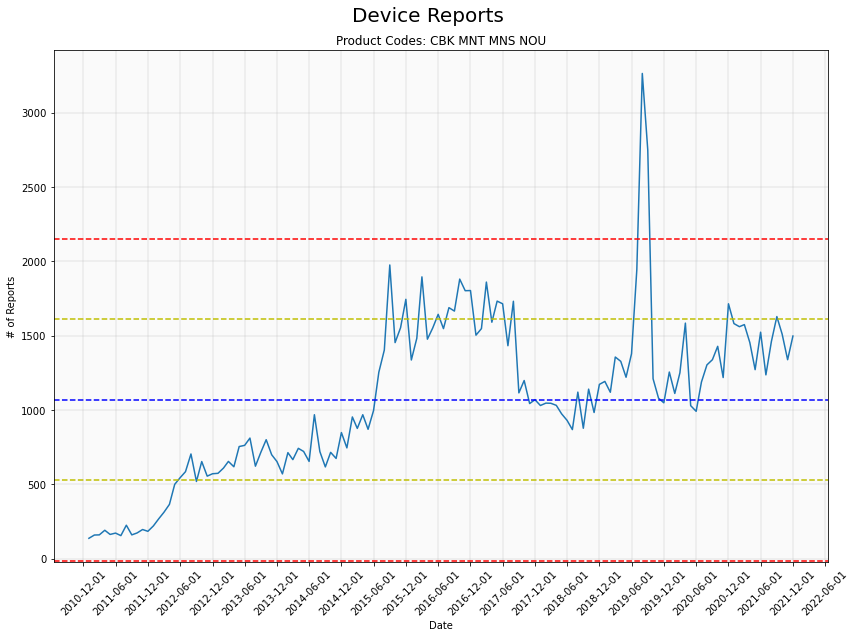

In [8]:
plt.rcParams["figure.figsize"] = [12, 9]
plt.rcParams["figure.autolayout"] = True

ax = plt.gca()

formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)

if len(dfline["date"].unique()) > 12:
    locator = mdates.MonthLocator(interval = 6)
else:
    locator = mdates.MonthLocator(interval = 1)
ax.xaxis.set_major_locator(locator)
plt.plot(dfline["date"], dfline["counts"])

plt.suptitle("Device Reports", fontsize = 20)
plt.title("Product Codes: " + " ".join(dfmain["product_code"].unique()))
plt.xlabel("Date")
plt.ylabel("# of Reports")
plt.xticks(rotation = 45)
plt.axhline(y=dfline["counts"].mean(), color='b', linestyle='--')
plt.axhline(y=dfline["counts"].mean()+dfline["counts"].std(), color='y', linestyle='--')
plt.axhline(y=dfline["counts"].mean()+dfline["counts"].std()*2, color='r', linestyle='--')
plt.axhline(y=dfline["counts"].mean()-dfline["counts"].std(), color='y', linestyle='--')
plt.axhline(y=dfline["counts"].mean()-dfline["counts"].std()*2, color='r', linestyle='--')

plt.grid(linewidth = 0.3)
ax.set_facecolor((.98, .98, .98))

plt.show()

In [9]:
# Create a linechart to show the change of a word over time
#Start by creating a new dataframe with the word count information for just the word in question

lineword = "ventilator"
lineyearstart = 2011
lineyearend = 2021

lineyearstart = str(lineyearstart) + "-01-01"
lineyearend = str(lineyearend) + "-12-31"

linedaterange = pd.date_range(lineyearstart,lineyearend, 
              freq='MS').strftime("%Y-%m-%d").tolist()

dfwordline = pd.DataFrame()
dfwordline["date"] = linedaterange

dfwordline["word"] = lineword

def get_word_count(wordinquestion, dateinquestion):
    try:
        countneeded = dfword.loc[(dfword['word'] == wordinquestion) & (dfword['date'] == dateinquestion)]["counts"].iat[0]
    except IndexError:
        countneeded = 0
    return countneeded

dfwordline["counts"] = dfwordline["date"].apply(lambda x: get_word_count(lineword, x))

dfwordline["date"] = pd.to_datetime(dfwordline["date"])

dfwordline.head()

,date,word,counts
0,2011-01-01,ventilator,126
1,2011-02-01,ventilator,146
2,2011-03-01,ventilator,148
3,2011-04-01,ventilator,177
4,2011-05-01,ventilator,150


In [10]:
#Attempting to reformat previous dataframe to allow for multiple words

# Create a linechart to show the change of a word over time
#Start by creating a new dataframe with the word count information for just the word in question

lineword = "ventilator, b6, battery, stop, manufacturer"
lineyearstart = 2011
lineyearend = 2021

#Separate words in string into a list of individual words
lineword = "".join(lineword.split())
lineword = lineword.lower()
lineword = lineword.split(",")

#Get range of dates to apply to each word
lineyearstart = str(lineyearstart) + "-01-01"
lineyearend = str(lineyearend) + "-12-31"

linedaterange = pd.date_range(lineyearstart,lineyearend, 
              freq='MS').strftime("%Y-%m-%d").tolist()

#Create function to retrieve the word counts from the main dataframe for the word specified and date specified
def get_word_count(wordinquestion, dateinquestion):
    try:
        countneeded = dfword.loc[(dfword['word'] == wordinquestion) & (dfword['date'] == dateinquestion)]["counts"].iat[0]
    except IndexError:
        countneeded = 0
    return countneeded

#Create a new, blank dataframe, and populate it
dfwordline = pd.DataFrame()

for zither in lineword:
    dfwordtemp = pd.DataFrame()
    dfwordtemp["date"] = linedaterange
    dfwordtemp["word"] = zither
    dfwordtemp["counts"] = dfwordtemp["date"].apply(lambda x: get_word_count(zither, x))
    dfwordline = pd.concat([dfwordline, dfwordtemp])

dfwordline["date"] = pd.to_datetime(dfwordline["date"])

dfwordline.head()

,date,word,counts
0,2011-01-01,ventilator,126
1,2011-02-01,ventilator,146
2,2011-03-01,ventilator,148
3,2011-04-01,ventilator,177
4,2011-05-01,ventilator,150


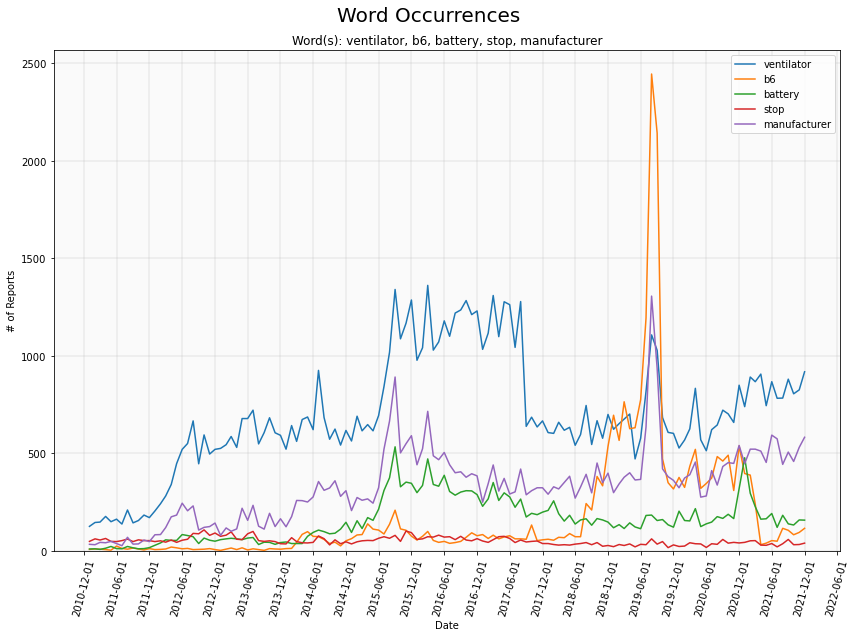

In [11]:
#Create line chart for individual word
plt.rcParams["figure.figsize"] = [12, 9]
plt.rcParams["figure.autolayout"] = True

ax = plt.gca()

formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)

if len(dfwordline["date"].unique()) > 12:
    locator = mdates.MonthLocator(interval = 6)
else:
    locator = mdates.MonthLocator(interval = 1)
ax.xaxis.set_major_locator(locator)

for raptor in lineword:
    plt.plot(dfwordline[dfwordline["word"] == raptor]["date"],dfwordline[dfwordline["word"] == raptor]["counts"], label = raptor)

plt.suptitle("Word Occurrences", fontsize = 20)
plt.title("Word(s): " + ", ".join(dfwordline["word"].unique()))
plt.xlabel("Date")
plt.ylabel("# of Reports")
plt.xticks(rotation = 75)
ax.set_ylim(ymin=0)

#plt.axhline(y=dfwordline["counts"].mean(), color='b', linestyle='--')
#plt.axhline(y=dfwordline["counts"].mean()+dfwordline["counts"].std(), color='y', linestyle='--')
#plt.axhline(y=dfwordline["counts"].mean()+dfwordline["counts"].std()*2, color='r', linestyle='--')
#plt.axhline(y=dfwordline["counts"].mean()-dfwordline["counts"].std(), color='y', linestyle='--')
#plt.axhline(y=dfwordline["counts"].mean()-dfwordline["counts"].std()*2, color='r', linestyle='--')

plt.legend()
plt.grid(linewidth = 0.3)
ax.set_facecolor((.98, .98, .98))

plt.savefig('plotlung.png')

plt.show()

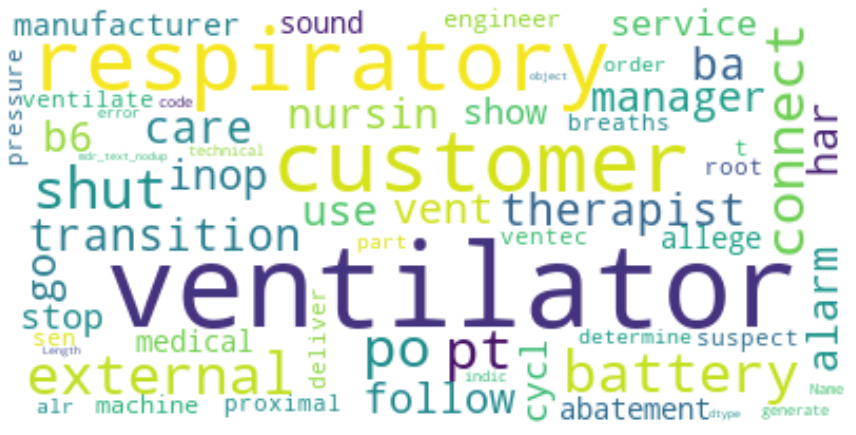

In [14]:
#Word Cloud Function

def generate_cloud(clouddata):
    word_cloud = WordCloud(collocations = False, background_color = 'white').generate(str(clouddata))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig('cloud.png')
    plt.show()

generate_cloud(dfmain["mdr_text_nodup"])

In [12]:
dfmain.head()

,product_code,brand_name,generic_name,manufacturer_name,type_of_report,report_number,report_source_code,date_received,event_type,mdr_text,mdr_text_nodup,plaindate
0,CBK,LTV,"VENTILATOR, CONTINUOUS / CBK","CAREFUSION 203, INC",Initial submission,2031702-2011-00286,Manufacturer report,2011-02-18,Malfunction,ventilator shut connect pt external battery po...,ventilator shut connect pt external battery po...,2011-02-01
1,CBK,ESPRIT VENTILATOR,"VENTILATOR, CONTINUOUS","RESPIRONICS CALIFORNIA, INC.",Initial submission,2031642-2011-00050,Manufacturer report,2011-02-15,Malfunction,respiratory therapist ventilator transition ba...,respiratory therapist ventilator transition ba...,2011-02-01
2,CBK,ESPRIT VENTILATOR,"VENTILATOR, CONTINUOUS","RESPIRONICS CALIFORNIA, INC.",Initial submission,2031642-2011-00018,Manufacturer report,2011-02-02,Malfunction,respiratory care manager follow b6 2010 b6 nur...,respiratory care manager follow b6 2010 nursin...,2011-02-01
3,CBK,ESPRIT VENTILATOR,"VENTILATOR, CONTINUOUS","RESPIRONICS CALIFORNIA, INC.",Initial submission,2031642-2011-00076,Manufacturer report,2011-03-24,Malfunction,customer ventilator go vent inop alarm use cus...,customer ventilator go vent inop alarm use har...,2011-03-01
4,CBK,840 VENTILATOR,VENTILATOR,PURITAN BENNETT CORP.,Initial submission,8020893-2011-00095,Manufacturer report,2011-02-28,Malfunction,service show customer 840 ventilator stop cycl...,service show customer 840 ventilator stop cycl...,2011-02-01
